In [1]:
pip install tensorflow


     |████████████████████████████████| 320.4 MB 9.6 kB/s  eta 0:00:01   |█▎                              | 12.6 MB 3.3 MB/s eta 0:01:33     |█▌                              | 15.5 MB 3.3 MB/s eta 0:01:32     |███▉                            | 38.5 MB 21.6 MB/s eta 0:00:14               | 93.6 MB 17.4 MB/s eta 0:00:14��▍               | 164.2 MB 40.4 MB/s eta 0:00:04     |█████████████████▎              | 173.2 MB 40.4 MB/s eta 0:00:04:00:08��█████████████▍    | 274.7 MB 39.7 MB/s eta 0:00:02ta 0:00:02
     |████████████████████████████████| 26.1 MB 64 kB/s s eta 0:00:01                     | 1.8 MB 17.5 MB/s eta 0:00:0202
     |████████████████████████████████| 57 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 20.1 MB 165 kB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 50.6 MB/s eta 0:00:01
     |███████████████████

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [28]:
tf.compat.v1.disable_eager_execution()
#disable_v2_behaviour()

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print( "Training data: {}, {}" .format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print( "Test data: {}, {}" .format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,) 


Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)


In [5]:
class_labels = np.unique(train_labels)
print( "There are {} classes in the dataset. They are: {}" .format(len(class_labels),
class_labels))
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9] 

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


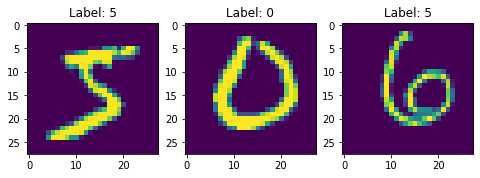

In [11]:
plt.figure(figsize=( 8 , 5 ))
plt.subplot( 1 , 3 , 1 )
plt.imshow(train_images[ 0 ])
plt.title( "Label: {}" .format(train_labels[ 0 ])) 

plt.subplot( 1 , 3 , 2 )
plt.imshow(train_images[ 2500 ])
plt.title( "Label: {}" .format(train_labels[ 2500 ]))

plt.subplot( 1 , 3 , 3 )
plt.imshow(test_images[ 100 ])
#plt.title( "Label: {}" .format(train_labels[ 100 ]))

plt.show()

In [13]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values
#range from 0 to 255.
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0 

In [14]:
# Split training data to training and validation sets.
x_train = train_images[ 0 : 50000 ]
x_val = train_images[ 50000 :]
y_train = train_labels[ 0 : 50000 ]
y_val = train_labels[ 50000 :] 

In [15]:
print( "x_train: {}" .format(x_train.shape)) # prints x_train: (50000, 28, 28)
print( "x_val: {}" .format(x_val.shape)) # prints x_val: (10000, 28, 28)
print( "y_train: {}" .format(y_train.shape)) #prints y_train: (50000,)
print( "y_val: {}" .format(y_val.shape)) #prints y_val: (10000,) 


x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [20]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[ 1 :]) 
x_train = x_train.reshape(x_train.shape[ 0 ], new_dimension)
x_val = x_val.reshape(x_val.shape[ 0 ], new_dimension)
test_images = test_images.reshape(test_images.shape[ 0 ], new_dimension) 

In [21]:
print( "x_train: {}" .format(x_train.shape)) #prints x_train: (50000, 784)
print( "x_val: {}" .format(x_val.shape)) #prints x_val: (10000, 784)
print( "test_images: {}" .format(test_images.shape)) #prints test_images: (10000, 784) 

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [22]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [29]:
# inputs
#placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [ None , new_dimension])
Y = tf.placeholder(tf.float32, [ None , no_labels]) 

AttributeError: module 'tensorflow' has no attribute 'placeholder'